In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_dry_gangrene = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/train/dry_gangrene"
train_wet_gangrene = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/train/wet_gangrene"
train_gas_gangrene = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/train/gas_gangrene"
train_normal_foot = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/train/normal_foot"

test_dry_gangrene = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/test/dry_gangrene"
test_wet_gangrene = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/test/wet_gangrene"
test_gas_gangrene = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/test/gas_gangrene"
test_normal_foot = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/test/normal_foot"

valid_dry_gangrene = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/valid/dry_gangrene"
valid_wet_gangrene = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/valid/wet_gangrene"
valid_gas_gangrene = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/valid/gas_gangrene"
valid_normal_foot = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/valid/normal_foot"


print("Number of dry_gangrene images in training set", total_files(train_dry_gangrene))
print("Number of wet_gangrene images in training set", total_files(train_wet_gangrene))
print("Number of gas_gangrene images in training set", total_files(train_gas_gangrene))
print("Number of normal_foot images in training set", total_files(train_normal_foot))

print("========================================================")

print("Number of dry_gangrene images in test set", total_files(test_dry_gangrene))
print("Number of wet_gangrene images in test set", total_files(test_wet_gangrene))
print("Number of gas_gangrene images in test set", total_files(test_gas_gangrene))
print("Number of normal_foot images in test set", total_files(test_normal_foot))

print("========================================================")

print("Number of dry_gangrene images in validation set", total_files(valid_dry_gangrene))
print("Number of wet_gangrene images in validation set", total_files(valid_wet_gangrene))
print("Number of gas_gangrene images in validation set", total_files(valid_gas_gangrene))
print("Number of normal_foot images in validation set", total_files(valid_normal_foot))

Number of dry_gangrene images in training set 42
Number of wet_gangrene images in training set 23
Number of gas_gangrene images in training set 22
Number of normal_foot images in training set 8
Number of dry_gangrene images in test set 42
Number of wet_gangrene images in test set 23
Number of gas_gangrene images in test set 22
Number of normal_foot images in test set 8
Number of dry_gangrene images in validation set 42
Number of wet_gangrene images in validation set 23
Number of gas_gangrene images in validation set 22
Number of normal_foot images in validation set 8


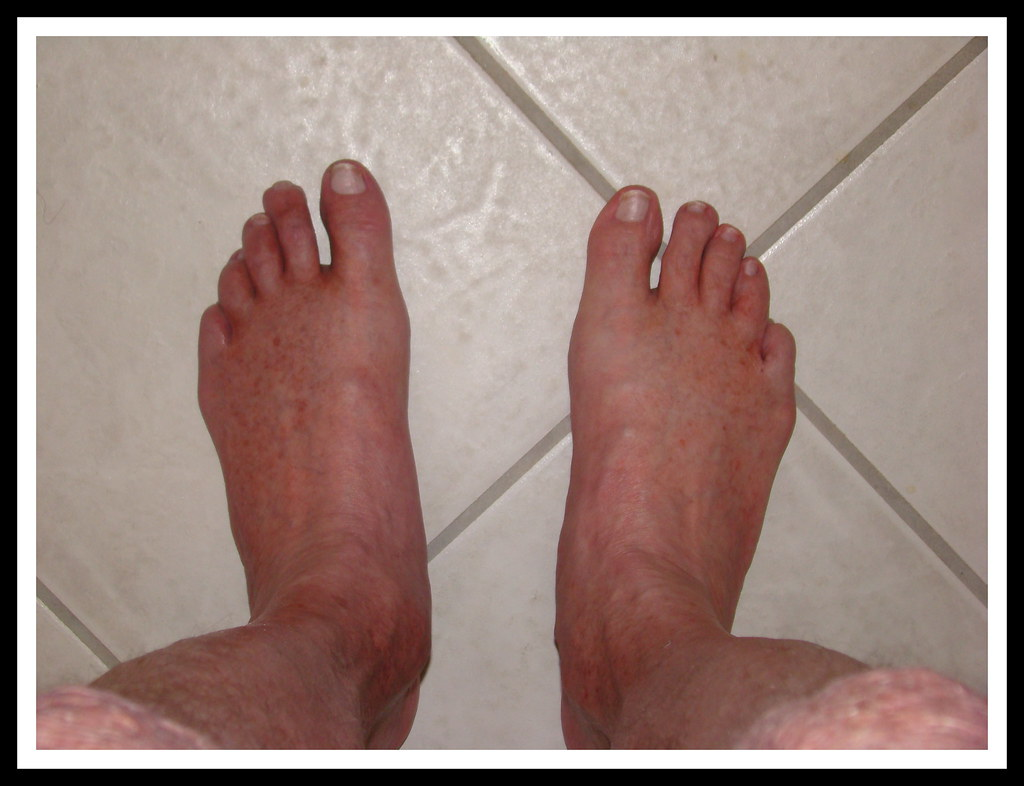

In [ ]:
from PIL import Image
import IPython.display as display

image_path = '/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/train/normal_foot/4821361372_06e20c245d_b.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

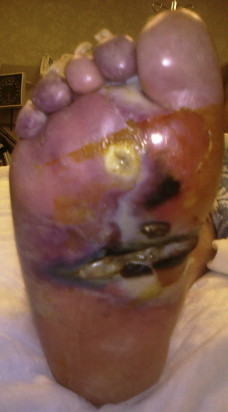

In [ ]:
image_path = '/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/train/gas_gangrene/1-s2.0-S1067251613004882-gr1.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, brightness_range=[0.5, 1.5])
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset')

Found 279 images belonging to 3 classes.


In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/valid',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 93 images belonging to 4 classes.
Found 93 images belonging to 4 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(225, 225, 3))

for layer in base_model.layers:
    layer.trainable = False
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

callbacks = [early_stop, model_checkpoint]

history = model.fit(train_generator,
                    batch_size=16,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_batch_size=16,
                    callbacks=callbacks
                    )

Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 0.7240 - accuracy: 0.6452 
Epoch 1: val_accuracy improved from -inf to 0.83871, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 55s 19s/step - loss: 0.7240 - accuracy: 0.6452 - val_loss: 0.5258 - val_accuracy: 0.8387
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 0.6226 - accuracy: 0.7742 
Epoch 2: val_accuracy did not improve from 0.83871
3/3 [==============================] - 48s 17s/step - loss: 0.6226 - accuracy: 0.7742 - val_loss: 0.5708 - val_accuracy: 0.7849
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 0.8110 - accuracy: 0.6667
Epoch 3: val_accuracy did not improve from 0.83871
3/3 [==============================] - 45s 16s/step - loss: 0.8110 - accuracy: 0.6667 - val_loss: 0.4795 - val_accuracy: 0.8172
Epoch 4/100
3/3 [==============================] - ETA: 0s - loss: 0.7564 - accuracy: 0.7634 
Epoch 4: val_accuracy improved from 0.83871 to 0.84946, saving model to best_model.h5
3/3 [==============================] - 49s 17s/step - loss: 0.7564 - accuracy: 0.7634 - val_loss: 0.5329 - val_accuracy: 0.8495
Epoch 5/100
3/3 [==

In [ ]:
'''history = model.fit(train_generator,
                    batch_size=16,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

NameError: name 'train_generator_resampled' is not defined

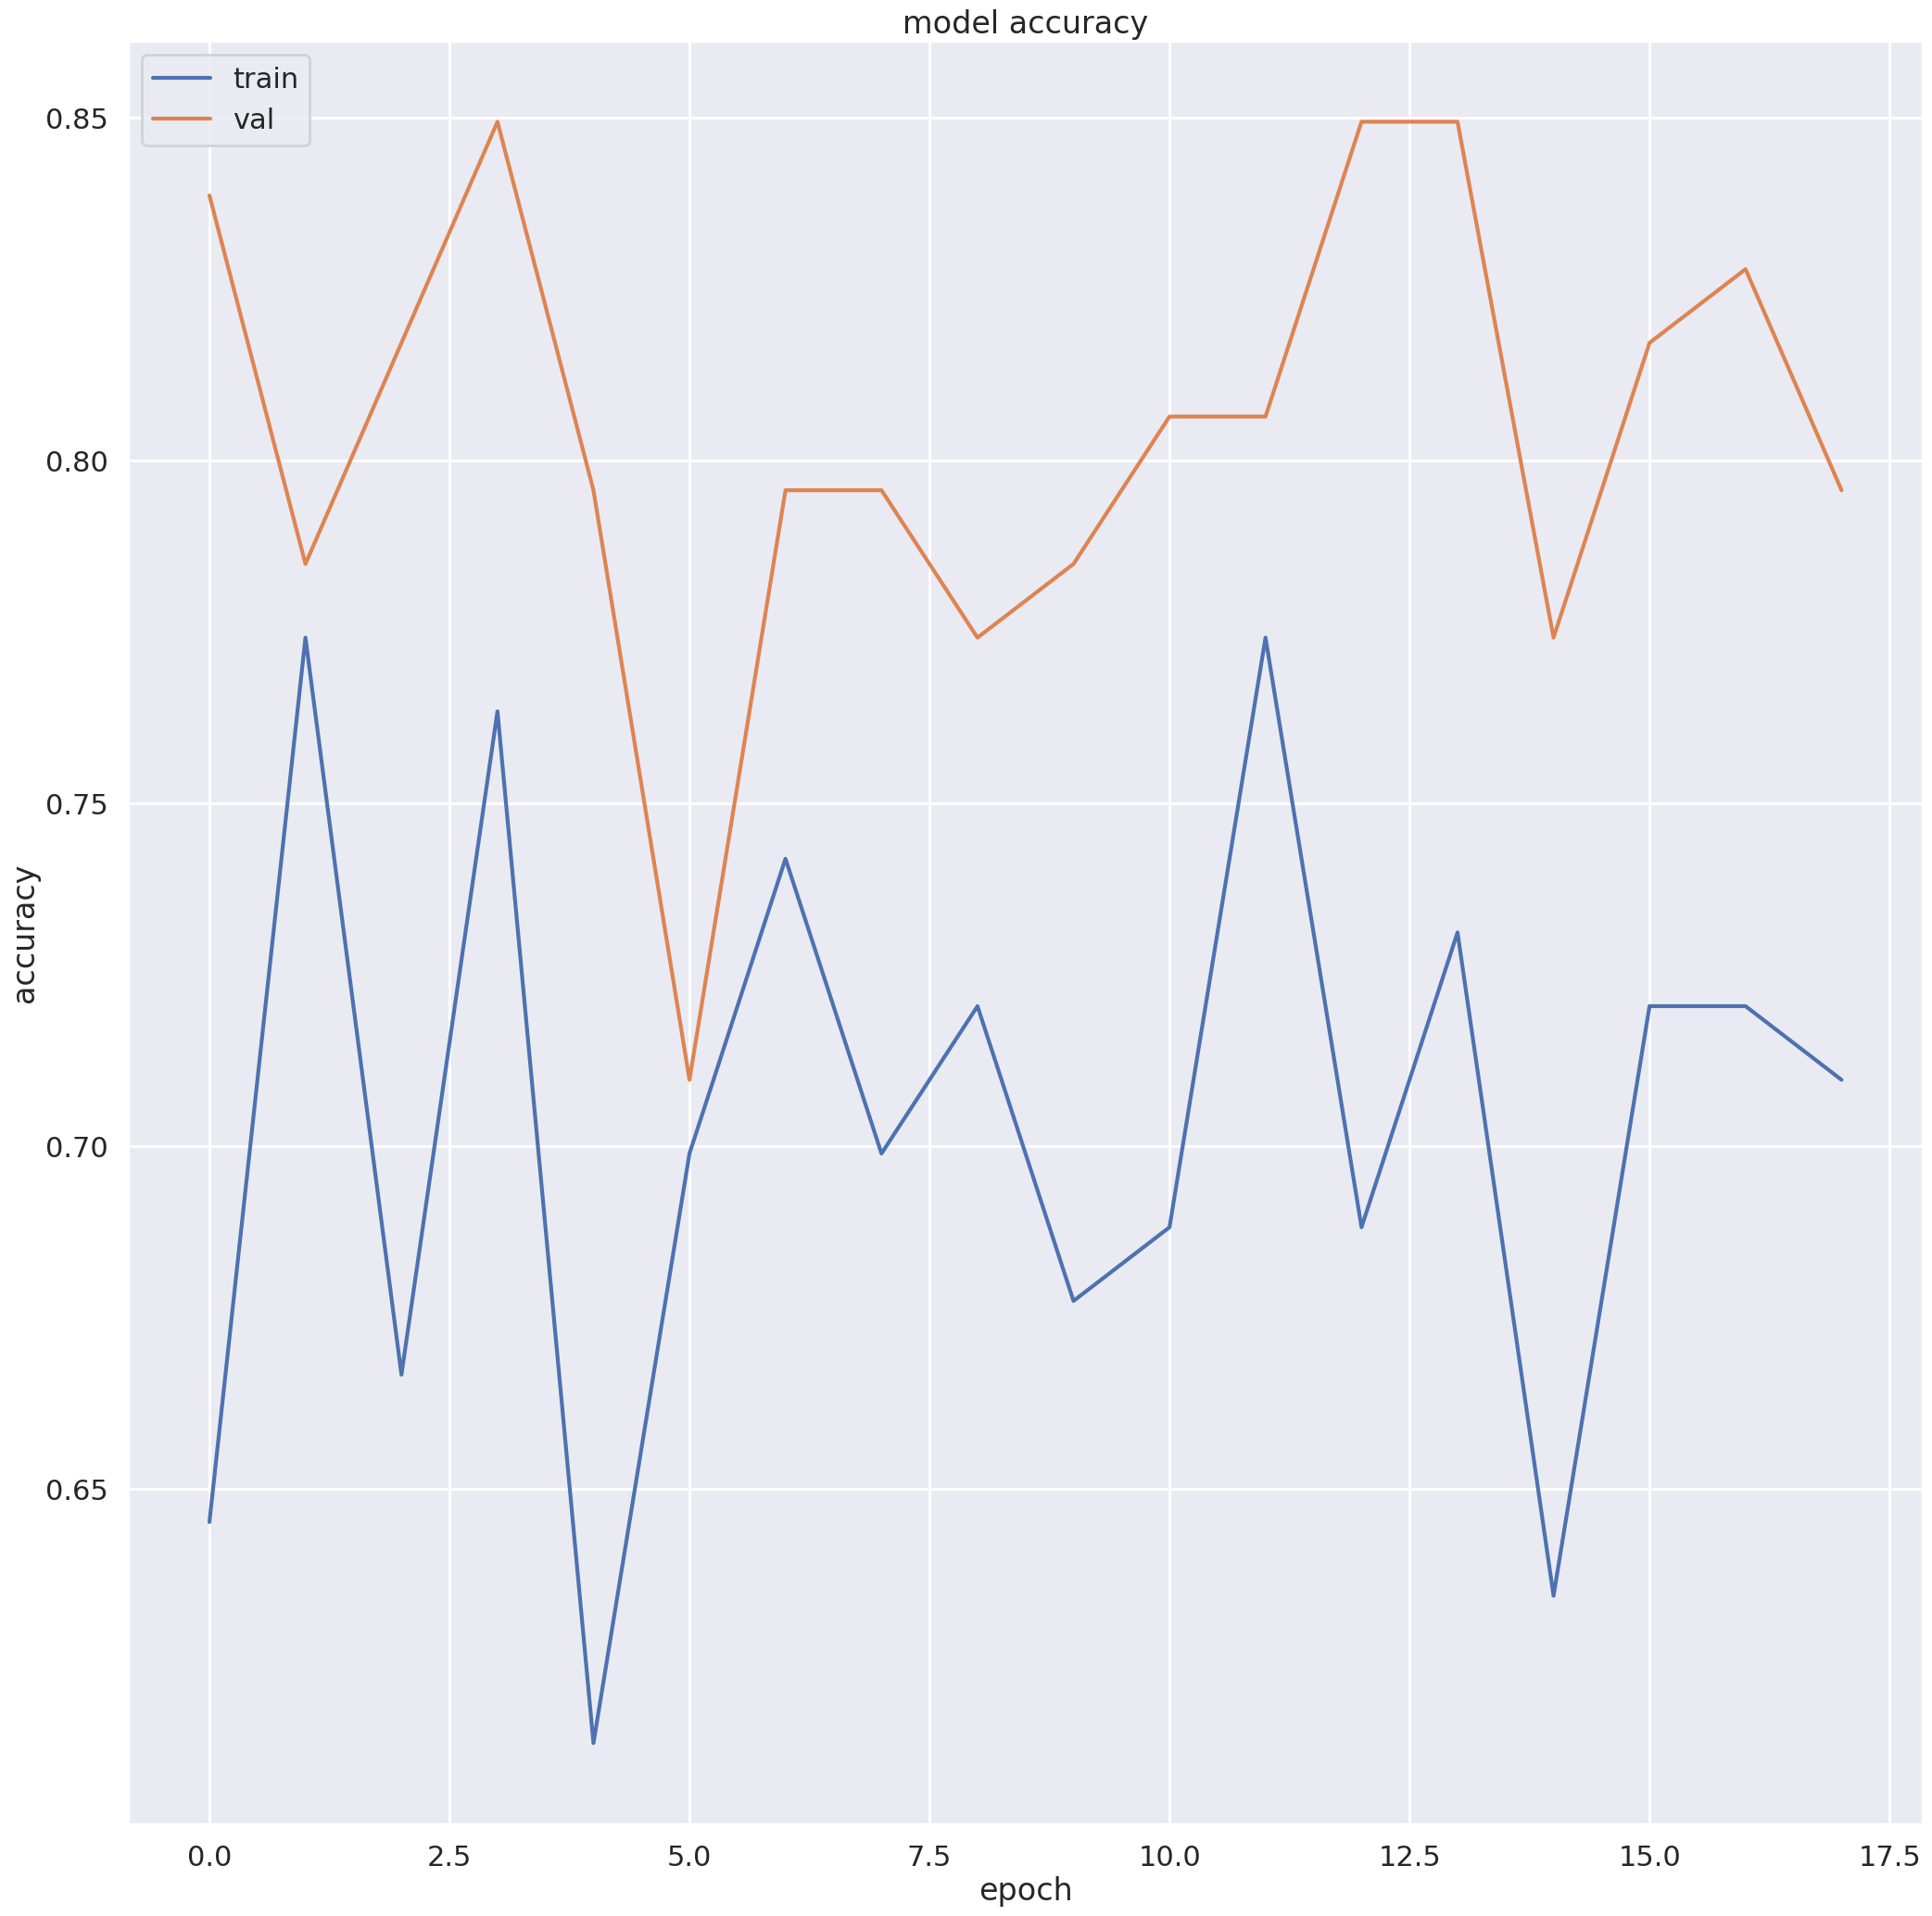

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!mv model.h5 /content/drive/MyDrive/

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/test/gas_gangrene/492685_1_En_37_Fig5_HTML.jpg'
)

In [ ]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 263ms/step


array([0.6875834 , 0.17484504, 0.01740923, 0.12016242], dtype=float32)

In [ ]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'dry_gangrene', 1: 'gas_gangrene', 2: 'normal_foot', 3: 'wet_gangrene'}

In [ ]:
from tensorflow.keras.models import load_model
# Define class labels in the correct order
class_labels = ['dry_gangrene', 'gas_gangrene', 'normal_foot', 'wet_gangrene']

# Load the model
model = load_model('/content/drive/MyDrive/model.h5')
if model is not None:
    print("Model loaded successfully!")
else:
    print("Error loading the model. Please check the file path and try again.")

# Preprocess the image
x = preprocess_image('/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/test/wet_gangrene/1-Figure1-1.png')

# Make predictions
predictions = model.predict(x)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_label = class_labels[predicted_class_index]

print(predicted_label)

Model loaded successfully!
1/1 [==============================] - 0s 192ms/step
wet_gangrene


In [ ]:
'''# For pre-trained model
from keras.applications.resnet50 import ResNet50, preprocess_input

# For SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# For Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# For Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# For F1 score calculation
from sklearn.metrics import f1_score

In [ ]:
'''# Load the pre-trained ResNet50 model without the top classification layer
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(225, 225, 3))

# Extract features from the training and validation sets
train_features = resnet50_model.predict_generator(train_generator, verbose=1)
validation_features = resnet50_model.predict_generator(validation_generator, verbose=1)

# Get the labels for training and validation sets
train_labels = train_generator.classes
validation_labels = validation_generator.classes

94765736/94765736 [==============================] - 4s 0us/step


<ipython-input-107-6b8e3a84f77c>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  train_features = resnet50_model.predict_generator(train_generator, verbose=1)


3/3 [==============================] - 26s 7s/step


<ipython-input-107-6b8e3a84f77c>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  validation_features = resnet50_model.predict_generator(validation_generator, verbose=1)


3/3 [==============================] - 25s 7s/step


In [ ]:
'''# SVM Hyperparameter Tuning
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1], 'probability': [True]}
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='f1_macro')
# Reshape the training features
train_features_reshaped = train_features.reshape(train_features.shape[0], -1)
# Fit the SVM model
svm_grid_search.fit(train_features_reshaped, train_labels)
svm_model = svm_grid_search.best_estimator_
# Reshape the validation features to have a maximum of two dimensions
validation_features_reshaped = validation_features.reshape(validation_features.shape[0], -1)
# Make predictions using the SVC model
svm_predictions = svm_model.predict(validation_features_reshaped)
# Calculate the F1 score
svm_f1 = f1_score(validation_labels, svm_predictions, average='macro')
# Print the F1 score
print(f"SVM F1 Score: {svm_f1}")


# Random Forest Hyperparameter Tuning
rf_param_dist = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'max_features': ['sqrt', 'log2']}
rf_random_search = RandomizedSearchCV(RandomForestClassifier(), rf_param_dist, cv=5, scoring='f1_macro', n_iter=10)
# Reshape the training features to have a maximum of two dimensions
train_features_reshaped = train_features.reshape(train_features.shape[0], -1)
rf_random_search.fit(train_features_reshaped, train_labels)
# Reshape the validation features to have a maximum of two dimensions
validation_features_reshaped = validation_features.reshape(validation_features.shape[0], -1)
# Make predictions using the Random Forest model
rf_predictions = rf_model.predict(validation_features_reshaped)
# Calculate the F1 score
rf_f1 = f1_score(validation_labels, rf_predictions, average='macro')
# Print the F1 score
print(f"Random Forest F1 Score: {rf_f1}")

# Logistic Regression Hyperparameter Tuning
lr_param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, scoring='f1_macro')
train_features_reshaped = train_features.reshape(train_features.shape[0], -1)
lr_grid_search.fit(train_features_reshaped, train_labels)
lr_model = lr_grid_search.best_estimator_
lr_predictions = lr_model.predict(validation_features_reshaped)
lr_f1 = f1_score(validation_labels, lr_predictions, average='macro')
print(f"Logistic Regression F1 Score: {lr_f1}")

SVM F1 Score: 0.3028586045468562


NameError: name 'rf_model' is not defined

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator

# Define class labels
class_labels = ['dry_gangrene', 'gas_gangrene', 'normal_foot', 'wet_gangrene']

# Load pre-trained ResNet50 model
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(225, 225, 3))

# Function to extract features
def extract_features(generator, model):
    features = model.predict(generator, verbose=1)
    return features.reshape(features.shape[0], -1)

# Data generators
train_data_dir = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/train"
validation_data_dir = "/content/drive/MyDrive/Laptop_backup/Gangrene_Detection/model/dataset/valid"
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, brightness_range=[0.5, 1.5])
validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, brightness_range=[0.5, 1.5])
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(225, 225), batch_size=32, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size=(225, 225), batch_size=32, class_mode='categorical')

# Extract features
train_features = extract_features(train_generator, resnet50_model)
validation_features = extract_features(validation_generator, resnet50_model)
train_labels = train_generator.classes
validation_labels = validation_generator.classes

# Hyperparameter tuning for SVM
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1]}
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='f1_macro')
svm_grid_search.fit(train_features, train_labels)
svm_model = svm_grid_search.best_estimator_

# Hyperparameter tuning for Random Forest
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'max_features': ['sqrt', 'log2']}
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='f1_macro')
rf_grid_search.fit(train_features, train_labels)
rf_model = rf_grid_search.best_estimator_

# Hyperparameter tuning for Logistic Regression
lr_param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, scoring='f1_macro')
lr_grid_search.fit(train_features, train_labels)
lr_model = lr_grid_search.best_estimator_

# Evaluate models
svm_predictions = svm_model.predict(validation_features)
svm_f1 = f1_score(validation_labels, svm_predictions, average='macro')
rf_predictions = rf_model.predict(validation_features)
rf_f1 = f1_score(validation_labels, rf_predictions, average='macro')
lr_predictions = lr_model.predict(validation_features)
lr_f1 = f1_score(validation_labels, lr_predictions, average='macro')

print(f"SVM F1 Score: {svm_f1}")
print(f"Random Forest F1 Score: {rf_f1}")
print(f"Logistic Regression F1 Score: {lr_f1}")


Found 93 images belonging to 4 classes.
Found 93 images belonging to 4 classes.
3/3 [==============================] - 28s 8s/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

SVM F1 Score: 0.25448924509074883
Random Forest F1 Score: 0.2565476190476191
Logistic Regression F1 Score: 0.22179432320638995
